In [1]:
%matplotlib inline 
# plots graphs within the notebook
%config InlineBackend.figure_format='svg' # not sure what this does, may be default images to svg format

from IPython.display import display,Image, Latex
from __future__ import division
from sympy.interactive import printing
printing.init_printing(use_latex='mathjax')

import time

from IPython.display import display,Image, Latex

from IPython.display import clear_output

#import SchemDraw as schem
#import SchemDraw.elements as e

import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.constants as sc

import sympy as sym

from IPython.core.display import HTML
def header(text):
    raw_html = '<h4>' + str(text) + '</h4>'
    return raw_html

def box(text):
    raw_html = '<div style="border:1px dotted black;padding:2em;">'+str(text)+'</div>'
    return HTML(raw_html)

def nobox(text):
    raw_html = '<p>'+str(text)+'</p>'
    return HTML(raw_html)

def addContent(raw_html):
    global htmlContent
    htmlContent += raw_html
    
class PDF(object):
  def __init__(self, pdf, size=(200,200)):
    self.pdf = pdf
    self.size = size

  def _repr_html_(self):
    return '<iframe src={0} width={1[0]} height={1[1]}></iframe>'.format(self.pdf, self.size)

  def _repr_latex_(self):
    return r'\includegraphics[width=1.0\textwidth]{{{0}}}'.format(self.pdf)

class ListTable(list):
    """ Overridden list class which takes a 2-dimensional list of 
        the form [[1,2,3],[4,5,6]], and renders an HTML Table in 
        IPython Notebook. """
    
    def _repr_html_(self):
        html = ["<table>"]
        for row in self:
            html.append("<tr>")
            
            for col in row:
                html.append("<td>{0}</td>".format(col))
            
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)
    
font = {'family' : 'serif',
        #'color'  : 'black',
        'weight' : 'normal',
        'size'   : 12,
        }
fontlabel = {'family' : 'serif',
        #'color'  : 'black',
        'weight' : 'normal',
        'size'   : 16,
        }

from matplotlib.ticker import FormatStrFormatter
plt.rc('font', **font) 

<h1>Steady Laminar Channel Flow</h1>

The objective of this first assignment is to compute the well-known Poiseuille velocity profile in a channel flow. Assuming that the channel length and width are both very large, the governing equations for an incompressible flow,
$$
\partial_xu+\partial_yv+\partial_z w = 0
$$
$$
\rho\left(\partial_t u+u\partial_x u+v\partial_y u+w\partial_z u\right) = -\partial_x p+\mu\left(\partial^2_x u +\partial^2_y u+\partial^2_z u\right)
$$
$$
\rho\left(\partial_t v+u\partial_x v+v\partial_y v+w\partial_z v\right) = -\partial_y p+\mu\left(\partial^2_x v +\partial^2_y v+\partial^2_z v\right)
$$
$$
\rho\left(\partial_t w+u\partial_x w+v\partial_y w+w\partial_z w\right) = -\partial_z p+\mu\left(\partial^2_x w +\partial^2_y w+\partial^2_z w\right)
$$
reduce to
<p class='alert alert-danger'>
$$
0=-\frac{d P}{dx}+\mu\frac{d^2u}{dx^2}
$$
</p>

<p class='alert alert-info'>
Demonstrate the above statement.
</p>

<h3  class='alert alert-success'> Solution</h3>


Several assumptions translate into simplifications:
<ul>
<li>Steady flow: $\partial_t =0$</li>
<li>Very long channel means fully developed, meaning invariance in $x$: $\partial_x=$</li>
<li>Very large channel means end effects in the span are neglected, meaning invariance in $z$: $\partial_z=0$ and also $w=0$</li>
</ul>
The continuity equation reduces to 

$$
\partial_y v =0
$$
which integrates to $v=$constant. Since $v=0$ at the wall, $v$ is zero everywhere. It is easy to reduce the 4 equations above to 

<div class='alert alert-danger'>
$$
0=-\frac{d P}{dx}+\mu\frac{d^2u}{dx^2}
$$
</div>

<h2> Taylor Series Expansion</h2>

Given an $C^\infty$ function $f$ defined over an interval $]a,b[$, for any $x\in]a,b[$ and any $h$ such that $x+h\in]a,b[$, the Taylor series expansion writes

<p class='alert alert-danger'>
$$
f(x+h)=f(x)+\sum_{n=1}^\infty\frac{h^n}{n!}\frac{d^n f}{dx^n}
$$
</p>
Practically, for a small increment $h$, $f(x+h)$ can be estimated as
<p class='alert alert-danger'>
$$
f(x+h)=f(x)+\sum_{n=1}^{N-1}\frac{h^n}{n!}\frac{d^n f}{dx^n}+{\cal O}(h^N)
$$
</p>
where
<p class='alert alert-danger'>
$$
{\cal O}(h^N)=\sum_{n=N}^{\infty}\frac{h^n}{n!}\frac{d^n f}{dx^n}
$$
is the <mark>truncation error</mark> which contains all terms affected by $h^n$ with $n\geq N$. Since $h$ is small, the large $n$, the smaller the contribution of $(h^n/n!)f^{(n)}(x)$. The above estimation of $f(x+h)$ is said to be <mark>of order $N$</mark>
</p>

Now, let's consider our channel, discretized as shown in the sketch below. This discretization technique is called <mark> finite difference method</mark>, which is used to solve PDEs and ODEs. Here our ODE is
<p class='alert alert-danger'>
$$
\mu\frac{d^2U}{dy^2}+G = 0\text{ with }G=-\frac{dP}{dx}
$$
</p>

In [2]:
PDF('figures/channel.pdf',size=(300,600))

<p class='alert alert-info'>
Demonstrate that you can estimate the derivative of $U$ at node $j+1/2$, using $U_j$ and $U_{j+1}$
</p>

To answer this question, you will use the following Taylor series expansion:
$$
U(y\pm\Delta y/2)=U(y)+\sum_{n=1}^\infty\frac{(\pm\Delta y/2)^n}{n!}\frac{d^nU}{dy^n}
$$

<h3 class='alert alert-success'> Solution</h3>

\begin{eqnarray}
U_{j+1} &=& U_{j+1/2}+\frac{\Delta y}{2}\left.\frac{dU}{dy}\right\vert_{j+1/2}+\frac{(\Delta y/2)^2}{2!}\left.\frac{d^2U}{dy^2}\right\vert_{j+1/2}+\frac{(\Delta y/2)^3}{3!}\left.\frac{d^3U}{dy^3}\right\vert_{j+1/2}+{\cal O}(\Delta y^4)\\
-U(j) &=& U{j+1/2}+\frac{-\Delta y}{2}\left.\frac{dU}{dy}\right\vert_{j+1/2}+\frac{(-\Delta y/2)^2}{2!}\left.\frac{d^2U}{dy^2}\right\vert_{j+1/2}+\frac{(-\Delta y/2)^3}{3!}\left.\frac{d^3U}{dy^3}\right\vert_{j+1/2}+{\cal O}(\Delta y^4)\\
=U_{j+1}-U_j&=&0+\Delta y\left.\frac{dU}{dy}\right\vert_{j+1/2}+\frac{\Delta y^3}{24}\left.\frac{d^3U}{dy^3}\right\vert_{j+1/2}+{\cal O}(\Delta y^4)
\end{eqnarray}
Therefore
<div class='alert alert-danger'>
$$
\left.\frac{dU}{dy}\right\vert_{j+1/2}=\frac{U_{j+1}-U_j}{\Delta y}+{\cal O}(\Delta y^2)
$$
</div>

<p class='alert alert-info'>
Using the derivative above, show that a numerical scheme for the second derivative of $U$ is
$$
\frac{d^2U}{dy^2}= \frac{U_{j-1}-2U_j+U_{j+1}}{\Delta y^2}+{\cal O}(\Delta y^2)
$$
</p>
The term ${\cal O}(\Delta y^2)$ represents the truncation error, i.e. all the terms from the Taylor series expansion that are affected with $\Delta y^n$ for $n\geq 2$.


<h3 class='alert alert-success'> Solution</h3>

Using Taylor expansion series:
\begin{eqnarray}
\frac{1}{\Delta y^2}U_{j+1} &=&\frac{1}{\Delta y^2}\left[U_j+\Delta y\left.\frac{dU}{dy}\right\vert_j+\frac{\Delta y^2}{2!}\left.\frac{d^2U}{dy^2}\right\vert_j+\frac{\Delta y^3}{3!}\left.\frac{d^3U}{dy^3}\right\vert_j+\frac{\Delta y^4}{4!}\left.\frac{d^4U}{dy^4}\right\vert_j+{\cal O}(\Delta y^5)\right]\\
-\frac{2}{\Delta y^2}U_{j} &=&\frac{-2}{\Delta y^2}\left[U_j\right]\\
+\frac{1}{\Delta y^2}U_{j-1} &=&\frac{1}{\Delta y^2}\left[U_j-\Delta y\left.\frac{dU}{dy}\right\vert_j+\frac{\Delta y^2}{2!}\left.\frac{d^2U}{dy^2}\right\vert_j-\frac{\Delta y^3}{3!}\left.\frac{d^3U}{dy^3}\right\vert_j+\frac{\Delta y^4}{4!}\left.\frac{d^4U}{dy^4}\right\vert_j+{\cal O}(\Delta y^5)\right]\\
=\frac{U_{j-1}-2U_j+U_{j+1}}{\Delta y^2}&=&\left.\frac{d^2U}{dy^2}\right\vert_j+2\frac{\Delta y^2}{4!}\left.\frac{d^4U}{dy^4}\right\vert_j+{\cal O}(\Delta y^4)
\end{eqnarray}
yielding
<div class='alert alert-danger'>
$$
\left.\frac{d^2U}{dy^2}\right\vert_j= \frac{U_{j-1}-2U_j+U_{j+1}}{\Delta y^2}+{\cal O}(\Delta y^2)
$$
</div>

<h2>Discretization</h2>

Following the work above, a second order approximation of our ODE is
<p class='alert alert-danger'>
$$
\frac{\mu}{\Delta y^2}U_{j-1}-\frac{2\mu}{\Delta y^2}U_{j}+\frac{\mu}{\Delta y^2}U_{j+1}=-G
$$
</p>
or
<p class='alert alert-danger'>
$$
a_jU_{j-1}+b_jU_{j}+c_jU_{j+1}=-G
$$
</p>
for $j=0,N-1$
At the boundaries, the velocity is imposed:
<p class='alert alert-danger'>
$$
U_{j=-1}=U_\text{lower wall}
$$
$$
U_{j=N}=U_\text{upper wall}
$$
</p>
This system of linear equation can be written in a matrix form:
$$
\left[\begin{matrix}
b_0 & c_0    & 0      & \cdots & \cdots  & 0 \\
a_1     & b_1    & c_1    & \ddots & \cdots  & \vdots \\
0       & \ddots & \ddots & \ddots & \ddots  & \vdots \\ 
\vdots  & \ddots & \ddots & \ddots & \ddots  & \vdots \\
0       & \cdots & \cdots & \cdots & a_{N-1}& b_{N-1} \\
\end{matrix}
\right]
\left[\begin{matrix}
u_0\\
u_1 \\
\vdots \\
\vdots \\
u_{ny-1}\\
\end{matrix}\right]
=
\left[\begin{matrix}
-G - a_0u_\text{lower wall}\\
-G \\
\vdots \\
\vdots \\
-G - c_{N-1}u_\text{upper wall}\\
\end{matrix}\right]
$$

The matrix being tridiagonal, we can solve this system using the efficient Thomas algorithm as follows:


In [3]:
import numpy as np
def TDMAsolver(a, b, c, d):
    '''
    TDMA solver, a b c d can be NumPy array type or Python list type.
    refer to http://en.wikipedia.org/wiki/Tridiagonal_matrix_algorithm
    '''
    nf = len(a)     # number of equations
    ac, bc, cc, dc = map(np.array, (a, b, c, d))     # copy the array
    for it in range(1, nf):
        mc = ac[it]/bc[it-1]
        bc[it] = bc[it] - mc*cc[it-1] 
        dc[it] = dc[it] - mc*dc[it-1]

    xc = ac
    xc[-1] = dc[-1]/bc[-1]

    for il in range(nf-2, -1, -1):
        xc[il] = (dc[il]-cc[il]*xc[il+1])/bc[il]

    del bc, cc, dc  # delete variables from memory

    return xc

<h3>Numerical solution</h3>

Here we will solve the flow inside a channel of half-height $h=1$, a pressure gradient $G=1$ and a viscosity $\mu=1/10$. Both walls are fixed.
<p class='alert alert-info'>
Write the code to solve our ODE.
</p>

<h3 class = 'alert alert-success'>Solution</h3>

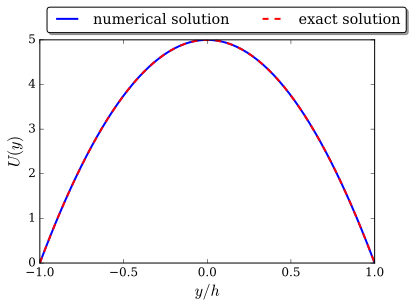

In [4]:
#number of computational nodes between walls
N = 128

#Flow and geometry parameters
mu = 1/10. #dynamic viscosity
h = 1. #half height of the channel
G = 1. #=-dP/dx pressure gradient
U_lower_wall = 0. #Velocity of the lower wall
U_upper_wall = 0. #Velocity of the upper wall

#Allocation of memory
U = np.zeros(N)                  #Velocity. On the sketch: from node j=0 to N-1
U_all = np.zeros(N+2)            #Velocity. On the sketch: from node j=-1 to N
y_all = np.linspace(-h, +h, N+2) #location of computational nodes from the lower to the upper wall
dy = y_all[1] - y_all[0]         #space between computational nodes
y = np.linspace(-h+dy, +h-dy, N) #location of computational nodes for vector U

#Matrix coefficients
a = mu/dy**2*np.ones(N)
b = -2.*mu/dy**2*np.ones(N)
c = mu/dy**2*np.ones(N)
#Right hand side vector
r = -G*np.ones(N)

#Boundary conditions
r[0] -= a[0]*U_lower_wall
r[N-1] -= c[N-1]*U_upper_wall

#solution using Thomas Algorithm
U = TDMAsolver(a, b, c, r)

#Copy array U onto U_all for plotting
U_all[1:N+1] = U
U_all[0] = U_lower_wall
U_all[N+1] = U_upper_wall

#Plot
plt.plot(y_all,U_all,lw=2,label = r"numerical solution")
U_exact = G/(2*mu)*(h**2-np.power(y_all,2))
plt.plot(y_all,U_exact,'r--',lw=2,label = r"exact solution")
plt.xlabel(r"$y/h$", fontdict = fontlabel)
plt.ylabel(r"$U(y)$", fontdict = fontlabel)
plt.legend(loc=3, bbox_to_anchor=[0, 1],
           ncol=2, shadow=True, fancybox=True)
plt.show()

<h3>Error Quantification</h3>
Visual verification is subjective. You should always rely on a statistical approach, such the $L^2$ or $L^\infty$.

<p class='alert alert-danger'>
$$
L^2 = \left[\sum_{i=0}^{N-1}(U^{numerical}_j-U_j^{exact})^2\right]^{1/2}
$$
$$
L^\infty = \max_{i=0,N-1}\left\vert U^{numerical}_j-U_j^{exact}\right\vert
$$
<p>

In [5]:
L2 = np.linalg.norm(U_all-U_exact,2)
print("L2 error= %1.4e" %L2)
Linf = np.linalg.norm(U_all-U_exact,np.inf)
print("Linfinity error= %1.4e" %Linf)

L2 error= 3.9434e-13
Linfinity error= 5.4179e-14


<h2> Steady State Laminar Channel with variable density</h2>

Variable density can occur through thermodynamics (e.g. geophysical flows with temperature/density gradients), non-Newtonian flow dynamics (e.q. shear dependent viscosity) and turbulent flows. In the latter, the viscosity is split into the viscosity of the fluid and the dissipative contribution of turbulence:

$$
\mu_{total}= \mu +\mu_t
$$

where $\mu_t$ is the turbulent viscosity calculated from a turbulence model (to be defined later).

<h3>Equation</h3>
Assuming a spatially variable viscosity $\mu$, the steady state, fully developed channel flow governing equation now writes:

$$
0=G+\frac{d}{dy}\mu\frac{dU}{dy}
$$

with walls located at $y=\pm h$.

<h2>Discrete Equation</h2>
Here we assume that velocity and viscosity are collocated. As before, the second derivative is obtained by computing the shear stress $\mu(du/dy)$ at nodes $j\pm1/2$ and then by taking the derivative of the shear stress at node $j$. Note that the viscosity needs to be interpolated at nodes $j\pm1/2$:

$$
\frac{1}{\Delta y}\left(\frac{\mu_{j+1}+\mu_{j}}{2}\frac{U_{j+1}-U_{j}}{\Delta y}-\frac{\mu_{j}+\mu_{j-1}}{2}\frac{U_{j}-U_{j-1}}{\Delta y}\right)=-G\;,
$$

which is rearranged as

$$
\frac{\mu_{j}+\mu_{j-1}}{2\Delta y^2}U_{j-1}-\frac{\mu_{j-1}+2\mu_{j}+\mu_{j-1}}{2\Delta y^2}U_j+\frac{\mu_{j}+\mu_{j-1}}{2\Delta y^2}U_{j+1} = -G\,.
$$

<p class='alert alert-info'>
Write a code for a turbulent flow using the following model:
$$
0=G+\frac{d}{dy}(\mu+\mu_t)\frac{dU}{dy}
$$
with
$$
\mu_t = \rho L_m\left\vert\frac{dU}{dy}\right\vert
$$
and
$$
L_m=\kappa y\left(1-e^{-y^+/A^+}\right)
$$

with $\kappa=0.41$, $y$ is the distance from the wall, $A^+=25$, $y^+=yu_\tau/\nu$, $\mu=1/300$ and $G=1$. The skin-friction velocity is defined as:

$$
\rho u_\tau^2=\mu\left.\frac{dU}{dy}\right\vert_{wall}
$$

</p>

Use <FONT FACE="courier" style="color:blue">nufd</FONT> to calculate the gradient of velocity. The function takes the locations of computational nodes as an argument and return a matrix, e.g. <FONT FACE="courier" style="color:blue">Dy</FONT>. The matrix product <FONT FACE="courier" style="color:blue">Dy*U</FONT> is the vector containing the first derivative of the vector <FONT FACE="courier" style="color:blue">U</FONT> at the locations of computational nodes. 

Note that the iterative solution uses an under/over relaxation method. At the end of each iteration, the solution becomes a weighted function of the new and old solutions:

$$
U_{new,final} = \omega U_{new}+(1-\omega)U_{old}
$$

If $\omega < 1$, this is an under-relaxation method, if $\omega > 1$, this is an over-relaxation method.

In [13]:
from scipy.sparse import csr_matrix
def nufd(x):
    n = len(x)
    h = x[1:]-x[:n-1]
    a0 = -(2*h[0]+h[1])/(h[0]*(h[0]+h[1]))
    ak = -h[1:]/(h[:n-2]*(h[:n-2]+h[1:]))
    an = h[-1]/(h[-2]*(h[-1]+h[-2]))
    b0 = (h[0]+h[1])/(h[0]*h[1]) 
    bk = (h[1:] - h[:n-2])/(h[:n-2]*h[1:])
    bn = -(h[-1]+h[-2])/(h[-1]*h[-2])
    c0 = -h[0]/(h[1]*(h[0]+h[1]))
    ck = h[:n-2]/(h[1:]*(h[:n-2]+h[1:]))
    cn = (2*h[-1]+h[-2])/(h[-1]*(h[-2]+h[-1]))
    val  = np.hstack((a0,ak,an,b0,bk,bn,c0,ck,cn))
    row = np.tile(np.arange(n),3)
    dex = np.hstack((0,np.arange(n-2),n-3))
    col = np.hstack((dex,dex+1,dex+2))
    D = csr_matrix((val,(row,col)),shape=(n,n))
    return D

In [14]:
def matrix_coeff(mu):
    #mu needs to be N+2
    global dy #tells python the dy defined in the main code
    n = len(mu)
    a = np.zeros(n-2)
    b = np.zeros(n-2)
    c = np.zeros(n-2)
    a[:] = (mu[0:-2]+mu[1:-1])/(2.*dy**2)
    b[:] = -(mu[0:-2]+2.*mu[1:-1]+mu[2:])/(2.*dy**2)
    c[:] = (mu[1:-1]+mu[2:])/(2.*dy**2)
    return a,b,c
def rhs(n,a,c):
    global G_0,U_lower_wall,U_upper_wall
    r = -G_0*np.ones(n)
    # boundary conditions
    r[0] -= a[0]*U_lower_wall
    r[n-1] -= c[n-1]*U_upper_wall
    return r


14 8.67876574873e-06


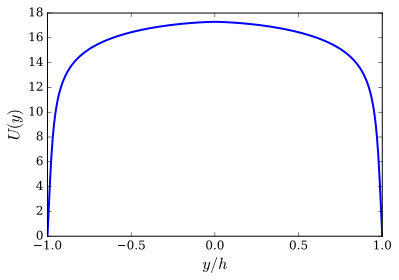

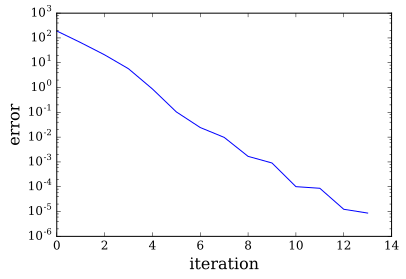

In [16]:
N = 512

mu = 1/300.
rho = 1.
nu = mu/rho
Aplus = 25.
h = 1. # half height of the channel
G_0 = 1. #=-dP/dx pressure gradient
U_lower_wall = 0.
U_upper_wall = 0.
kappa = 0.41

# allocate memory for variables
U = np.zeros(N)
U_all = np.zeros(N+2)

# define location of computational nodes
y_all = np.linspace(-h, +h, N+2)
dy = y_all[1] - y_all[0]
y = np.linspace(-h+dy, +h-dy, N)

#Compute the derivation matrix to obtain first derivative in y
Dy_all = nufd(y_all)

# first guess for a,b,c: mu_t=0
mu_total = mu*np.ones(N+2)
#Matrix coefficients
a = np.zeros(N)
b = np.zeros(N)
c = np.zeros(N)
a,b,c = matrix_coeff(mu_total)
#Right hand side vector
r = -G_0*np.ones(N)
r -= G

#Boundary conditions
r[0] -= a[0]*U_lower_wall
r[N-1] -= c[N-1]*U_upper_wall

#Laminar solution (first guess)
U = TDMAsolver(a, b, c, r)
U_all[1:N+1] = U
U_all[0] = U_lower_wall
U_all[N+1] = U_upper_wall

gradU_all = np.zeros(N+2)
gradU_all = Dy_all*U_all
# plt.plot(y_all,mu*gradU_all)
# define distance from the wall (careful we are in a channel)
y_dist_all = np.zeros(N+2)
mask = np.where(y_all > 0.)
y_dist_all = h + y_all
y_dist_all[mask] = h - y_all[mask]

#mixing length model
def eddy_viscosity(Uall):
    global Dy_all,y_dist_all,nu,mu,rho
    n = len(Uall)
    Lm = np.zeros(n)
    gradU_all = Dy_all*Uall
    tauw = mu * gradU_all[0] #wall shear stress
    utau = np.sqrt(tauw/rho) #skin friction velocity
    y_plus_all = y_dist_all*utau/nu
    Lm = kappa*y_dist_all*(1.-np.exp(-y_plus_all/Aplus))
    mutotal = np.zeros(n)
    mutotal = rho * np.power(Lm,2)*np.abs(gradU_all)
    return mutotal

error_U = np.inf
tolerance_U = 1e-5
mu_t = np.zeros(N+2)
itermax = 1000
iteration = 0
error_tab = np.zeros(itermax)
relax_U = 0.65
while (error_U > tolerance_U) and (iteration < itermax) :
    mu_total = np.zeros(N+2)
    U_old = np.copy(U)
    U_all_old = np.copy(U_all)
    # new viscosity
    mu_total = mu + eddy_viscosity(U_all)
    # new matrix coefficients
    a, b, c = matrix_coeff(mu_total)
    # new right hand side vector
    r = rhs(N,a,c)
    # solve for new U
    U = TDMAsolver(a, b, c, r)
    # relaxation step
    U = relax_U * U + (1-relax_U)*U_old
    U_all[1:N+1] = U
    U_all[0] = U_lower_wall
    U_all[N+1] = U_upper_wall
    #
    error_U = np.linalg.norm(U_old - U, np.inf)
    error_tab[iteration] = error_U
    iteration += 1
print(iteration,error_U)

plt.plot(y_all,U_all,lw=2)
U_exact = G_0/(2*mu)*(h**2-np.power(y_all,2))
plt.xlabel(r"$y/h$", fontdict = fontlabel)
plt.ylabel(r"$U(y)$", fontdict = fontlabel)
# plt.legend(loc=3, bbox_to_anchor=[0, 1],
#            ncol=2, shadow=True, fancybox=True)
plt.show()
mask = np.where(error_tab > 0.)
plt.semilogy(error_tab[mask])
plt.xlabel(r"iteration", fontdict = fontlabel)
plt.ylabel(r"error", fontdict = fontlabel)
# plt.legend(loc=3, bbox_to_anchor=[0, 1],
#            ncol=2, shadow=True, fancybox=True)
plt.show()

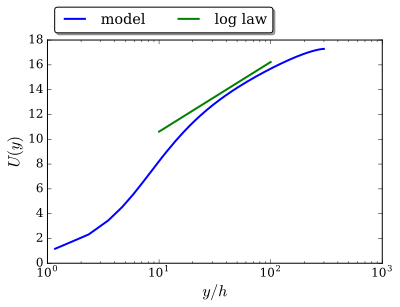

In [12]:
gradU_all = Dy_all*U_all
tauw = mu * gradU_all[0] #wall shear stress
utau = np.sqrt(tauw/rho) #skin friction velocity
y_plus_all = y_dist_all*utau/nu
plt.semilogx(y_plus_all[1:N//2+1],U_all[1:N//2+1], lw =2, label="model")
plt.xlabel(r"$y/h$", fontdict = fontlabel)
plt.ylabel(r"$U(y)$", fontdict = fontlabel)
y_log_law = np.logspace(1,2,10)
U_log_law = 1/kappa*np.log(y_log_law)+5.0
plt.semilogx(y_log_law,U_log_law,lw = 2, label="log law")
plt.legend(loc=3, bbox_to_anchor=[0, 1],
           ncol=2, shadow=True, fancybox=True)
plt.show()

<p class='alert alert-info'>
Now write a code for a non-Newtonian fluid, using the following viscosity for non-Newtonian fluids

$$
\mu_{total}(\dot{\gamma}) = \mu_\infty + (\mu_0-\mu_\infty)\left(1+(\lambda\dot{\gamma})^2\right)^\frac{n-1}{2}
$$

with $\mu_0=1/10$, $\mu_\infty=1/100$, $\lambda=1$ and $n=-0.05$. The variable $\dot{\gamma}$ is the local shear $dU/dy$. Compare to the Newtonian solution. With these parameters, the fluid is shear thinning. Do you <b>verify</b> that the code is showing the proper physics? Using increasing resolution, develop a <b>validation</b> of the non-Newtonian solution.
</p>

<h3 class = 'alert alert-success'>Solution</h3>